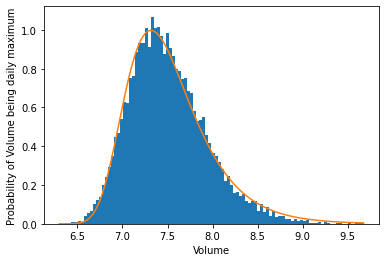

In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
mean_hunger = 5
samples_per_day = 100
n_days = 10000
samples = np.random.normal(loc=mean_hunger, size=(n_days, samples_per_day))
daily_maxes = np.max(samples, axis=1)

def gumbel_pdf(prob,loc,scale):
    z = (prob-loc)/scale
    return np.exp(-z-np.exp(-z))/scale

def plot_maxes(daily_maxes):
    probs,hungers,_=plt.hist(daily_maxes,density=True,bins=100)
    plt.xlabel('Volume')
    plt.ylabel('Probability of Volume being daily maximum')
    (loc,scale),_=curve_fit(gumbel_pdf,hungers[:-1],probs)
    #curve_fit用于曲线拟合
    #接受需要拟合的函数（函数的第一个参数是输入，后面的是要拟合的函数的参数）、输入数据、输出数据
    #返回的是函数需要拟合的参数
    # https://blog.csdn.net/guduruyu/article/details/70313176
    plt.plot(hungers,gumbel_pdf(hungers,loc,scale))
    


plt.figure()
plot_maxes(daily_maxes)

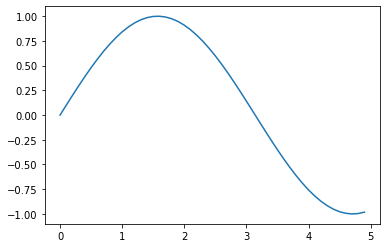

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)

In [ ]:
n_cats = 7
cats = np.arange(n_cats)
probs = np.random.randint(low=1, high=20, size=n_cats)
probs = probs / sum(probs)
logits = np.log(probs)
def plot_probs():
    plt.bar(cats, probs)
    plt.xlabel("Category")
    plt.ylabel("Probability")
plt.figure()
plot_probs()


In [ ]:
year = 2016
event = 'Referendum'
print(f'Results of the {year} {event}')


In [ ]:
yes_votes = 42_572_654
no_votes = 43_132_495
percentage = yes_votes /(yes_votes + no_votes)
'{:-8} YES votes {:2.2%}'.format(yes_votes, percentage)


In [ ]:
a = [1.1, 2.2, 3.3]
'-'.join(['{:.2f}']*len(a)).format(*a)
# https://blog.csdn.net/BabyFish13/article/details/80223038,
# https://docs.python.org/3/tutorial/inputoutput.html
# format传入list需要加*，传入dict需要加**

In [ ]:
np.arange(n_cats+1)

In [ ]:
n_samples = 1000
def plot_estimated_probs(samples,ylabel=''):
    n_cats = np.max(samples)+1
    estd_probs,_,_ = plt.hist(samples,bins=np.arange(n_cats+1),align='left',edgecolor='white',density=True)
    plt.xlabel('Category')
    plt.ylabel(ylabel+'Estimated probability')
    return estd_probs
def print_probs(probs):
    print('  '.join(['{:.2f}']*len(probs)).format(*probs))

samples = np.random.choice(cats,p=probs,size=n_samples) 

plt.figure()
plt.subplot(1,2,1)
plot_probs()
plt.subplot(1,2,2)
estd_probs = plot_estimated_probs(samples)
plt.tight_layout()#紧凑显示图片

print('Original probabilities:\t\t',end='')
print_probs(probs)
print('Estimated probabilities:\t',end='')
print_probs(estd_probs)

In [ ]:
def sample_gumbel(logits):
    noise = np.random.gumbel(size=len(logits))
    sample = np.argmax(logits+noise)
    return sample
gumbel_samples = [sample_gumbel(logits) for _ in range(n_samples)] # 这个是gumbel-max策略而不是gumbel-softmax策略

def sample_uniform(logits):
    noise = np.random.uniform(size=len(logits))
    sample = np.argmax(logits+noise)
    return sample
uniform_samples = [sample_uniform(logits) for _ in range(n_samples)]

def sample_normal(logits):
    noise = np.random.normal(size=len(logits))
    sample = np.argmax(logits+noise)
    return sample
normal_samples = [sample_normal(logits) for _ in range(n_samples)]

plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plot_probs()
plt.subplot(1,4,2)
gumbel_estd_probs = plot_estimated_probs(gumbel_samples,'Gumbel ')
plt.subplot(1,4,3)
normal_estd_probs = plot_estimated_probs(normal_samples,'Normal ')
plt.subplot(1,4,4)
uniform_estd_probs = plot_estimated_probs(uniform_samples,'Uniform ')
plt.tight_layout()

print('Original probabilities:\t\t',end='')
print_probs(probs)
print('Gumbel Estimated probabilities:\t',end='')
print_probs(gumbel_estd_probs)
print('Normal Estimated probabilities:\t',end='')
print_probs(normal_estd_probs)
print('Uniform Estimated probabilities:',end='')
print_probs(uniform_estd_probs)